# Uniformity


```python

# Treating date data
birthdays['Birthday'] = pd.to_datetime(birthdays['Birthday'],
        # Attempt to infer format of each date
        infer_datetime_format=True,
        # Return NA for rows where conversion failed
        errors = 'coerce')



```

## Uniform currencies
> 
> In this exercise and throughout this chapter, you will be working with a retail banking dataset stored in the `banking` DataFrame. The dataset contains data on the amount of money stored in accounts, their currency, amount invested, account opening date and last transaction date that were consolidated from American and European branches.
> 
> You are tasked with understanding the average account size and how investments vary by the size of account, however in order to produce this analysis accurately, you first need to unify the currency amount into dollars. The `pandas` package has been imported as `pd`, and the `banking` DataFrame is in your environment.

### init

In [1]:
###################
##### Dataframe
###################

#upload and download

from downloadfromFileIO import saveFromFileIO
""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
uploadToFileIO(banking)
"""

tobedownloaded="""
{pandas.core.frame.DataFrame: {'banking.csv': 'https://file.io/yu1gxAIwltxD'}}
"""
prefixToc='1.1'
prefix = saveFromFileIO(tobedownloaded, prefixToc=prefixToc)

#initialisation

import pandas as pd
banking = pd.read_csv(prefix+'banking.csv',index_col=0)

Téléchargements à lancer
{'pandas.core.frame.DataFrame': {'banking.csv': 'https://file.io/yu1gxAIwltxD'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5318    0  5318    0     0   8746      0 --:--:-- --:--:-- --:--:--  8732



### code

[Uniform currencies | Python](https://campus.datacamp.com/courses/cleaning-data-in-python/advanced-data-problems-3?ex=3)

> -   Find the rows of `acct_cur` in `banking` that are equal to `'euro'` and store them in `acct_eu`.
> -   Find all the rows of `acct_amount` in `banking` that fit the `acct_eu` condition, and convert them to USD by multiplying them with `1.1`.
> -   Find all the rows of `acct_cur` in `banking` that fit the `acct_eu` condition, set them to `'dollar'`.

In [3]:
# Find values of acct_cur that are equal to 'euro'
acct_eu = banking['acct_cur'] == 'euro'

# Convert acct_amount where it is in euro to dollars
banking.loc[acct_eu, 'acct_amount'] = banking.loc[acct_eu, 'acct_amount'] * 1.1

# Unify acct_cur column by changing 'euro' values to 'dollar'
banking.loc[acct_eu, 'acct_cur'] = 'dollar'

# Assert that only dollar currency remains
assert banking['acct_cur'].unique() == 'dollar'

## Uniform dates
> 
> After having unified the currencies of your different account amounts, you want to add a temporal dimension to your analysis and see how customers have been investing their money given the size of their account over each year. The `account_opened` column represents when customers opened their accounts and is a good proxy for segmenting customer activity and investment over time.
> 
> However, since this data was consolidated from multiple sources, you need to make sure that all dates are of the same format. You will do so by converting this column into a `datetime` object, while making sure that the format is inferred and potentially incorrect formats are set to missing. The `banking` DataFrame is in your environment and `pandas` was imported as `pd`.

[Uniform dates | Python](https://campus.datacamp.com/courses/cleaning-data-in-python/advanced-data-problems-3?ex=4)

> Print the header of `account_opened` from the `banking` DataFrame and take a look at the different results.

In [4]:
# Print the header of account_opened
print(banking['account_opened'].head())

0    03-05-18
1    21-01-18
2    26-01-18
3    21-08-17
4    05-06-17
Name: account_opened, dtype: object


[Uniform dates | Python](https://campus.datacamp.com/courses/cleaning-data-in-python/advanced-data-problems-3?ex=4)

> Convert the `account_opened` column to `datetime`, while making sure the date format is inferred and that erroneous formats that raise error return a missing value.

In [5]:
# Convert account_opened to datetime
banking['account_opened'] = pd.to_datetime(banking['account_opened'],
                                           # Infer datetime format
                                           infer_datetime_format = True,
                                           # Return missing value for error
                                           errors = 'coerce') 

In [10]:
# Get year of account opened
banking['acct_year'] = banking['account_opened'].dt.strftime('%Y')

# Print acct_year
banking['acct_year']

0     2018
1     2018
2     2018
3     2017
4     2017
      ... 
92    2017
93    2018
94    2018
95    2017
96    2017
Name: acct_year, Length: 97, dtype: object

# Cross field validation

```python

# Cross field validation
# The use of multiple elds in a dataset to sanity check data integrity
sum_classes = flights[['economy_class', 'business_class', 'first_class']].sum(axis = 1)



```

## How's our data integrity?
> 
> New data has been merged into the `banking` DataFrame that contains details on how investments in the `inv_amount` column are allocated across four different funds A, B, C and D.
> 
> Furthermore, the age and birthdays of customers are now stored in the `age` and `birth_date` columns respectively.
> 
> You want to understand how customers of different age groups invest. However, you want to first make sure the data you're analyzing is correct. You will do so by cross field checking values of `inv_amount` and `age` against the amount invested in different funds and customers' birthdays. Both `pandas` and `datetime` have been imported as `pd` and `dt` respectively.

### init

In [11]:
###################
##### Dataframe
###################

#upload and download

from downloadfromFileIO import saveFromFileIO
""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
uploadToFileIO(banking)
"""

tobedownloaded="""
{pandas.core.frame.DataFrame: {'banking.csv': 'https://file.io/6d8Fr3jEZdIP'}}
"""
prefixToc='2.1'
prefix = saveFromFileIO(tobedownloaded, prefixToc=prefixToc)

#initialisation

import pandas as pd
banking = pd.read_csv(prefix+'banking.csv',index_col=0)

Téléchargements à lancer
{'pandas.core.frame.DataFrame': {'banking.csv': 'https://file.io/6d8Fr3jEZdIP'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  8956    0  8956    0     0  15128      0 --:--:-- --:--:-- --:--:-- 15102



In [24]:
banking['birth_date']=pd.to_datetime(banking['birth_date'])

### code

[How's our data integrity? | Python](https://campus.datacamp.com/courses/cleaning-data-in-python/advanced-data-problems-3?ex=7)

> -   Find the rows where the sum of all rows of the `fund_columns` in `banking` are equal to the `inv_amount` column.
> -   Store the values of `banking` with consistent `inv_amount` in `consistent_inv`, and those with inconsistent ones in `inconsistent_inv`.

In [25]:
# Store fund columns to sum against
fund_columns = ['fund_A', 'fund_B', 'fund_C', 'fund_D']

# Find rows where fund_columns row sum == inv_amount
inv_equ = banking[fund_columns].sum(axis=1) == banking['inv_amount']

# Store consistent and inconsistent data
consistent_inv = banking.loc[inv_equ]
inconsistent_inv = banking.loc[~inv_equ]

# Store consistent and inconsistent data
print("Number of inconsistent investments: ", inconsistent_inv.shape[0])

Number of inconsistent investments:  8


[How's our data integrity? | Python](https://campus.datacamp.com/courses/cleaning-data-in-python/advanced-data-problems-3?ex=7)

> -   Store today's date into `today`, and manually calculate customers' ages and store them in `ages_manual`.
> -   Find all rows of `banking` where the `age` column is equal to `ages_manual` and then filter `banking` into `consistent_ages` and `inconsistent_ages`.

In [26]:
from datetime import date

In [27]:
# Store today's date and find ages
today = date.today()

ages_manual = today.year - banking['birth_date'].dt.year

# Find rows where age column == ages_manual
age_equ = banking['age'] == ages_manual

# Store consistent and inconsistent data
consistent_ages = banking.loc[age_equ]
inconsistent_ages = banking.loc[~age_equ]

# Store consistent and inconsistent data
print("Number of inconsistent ages: ", inconsistent_ages.shape[0])

Number of inconsistent ages:  4


# Completeness

```python

# Return missing values
airquality.isna()


# Get summary of missingness
airquality.isna().sum()

# Missingno
# Useful package for visualizing and understanding missing data
import missingno as msno
import matplotlib.pyplot as plt
# Visualize missingness
msno.matrix(airquality)
plt.show()


# Dropping missing values
airquality_dropped = airquality.dropna(subset = ['CO2'])
airquality_dropped.head()

# Replacing with statistical measures
co2_mean = airquality['CO2'].mean()
airquality_imputed = airquality.fillna({'CO2': co2_mean})
airquality_imputed.head()

```


## Missing investors
> 
> Dealing with missing data is one of the most common tasks in data science. There are a variety of types of missingness, as well as a variety of types of solutions to missing data.
> 
> You just received a new version of the `banking` DataFrame containing data on the amount held and invested for new and existing customers. However, there are rows with missing `inv_amount` values.
> 
> You know for a fact that most customers below 25 do not have investment accounts yet, and suspect it could be driving the missingness. The `pandas`, `missingno` and `matplotlib.pyplot` packages have been imported as `pd`, `msno` and `plt` respectively. The `banking` DataFrame is in your environment.

### init

In [28]:
###################
##### Dataframe
###################

#upload and download

from downloadfromFileIO import saveFromFileIO
""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
uploadToFileIO(banking)
"""

tobedownloaded="""
{pandas.core.frame.DataFrame: {'banking.csv': 'https://file.io/Gta0kNlxegUN'}}
"""
prefixToc='3.1'
prefix = saveFromFileIO(tobedownloaded, prefixToc=prefixToc)

#initialisation

import pandas as pd
banking = pd.read_csv(prefix+'banking.csv',index_col=0)

Téléchargements à lancer
{'pandas.core.frame.DataFrame': {'banking.csv': 'https://file.io/Gta0kNlxegUN'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4883    0  4883    0     0   7255      0 --:--:-- --:--:-- --:--:--  7255



In [34]:
import missingno as msno
import matplotlib.pyplot as plt

### code

[Missing investors | Python](https://campus.datacamp.com/courses/cleaning-data-in-python/advanced-data-problems-3?ex=10)

> -   Print the number of missing values by column in the `banking` DataFrame.
> -   Plot and show the missingness matrix of `banking` with the `msno.matrix()` function.

cust_id              0
age                  0
acct_amount          0
inv_amount          13
account_opened       0
last_transaction     0
dtype: int64


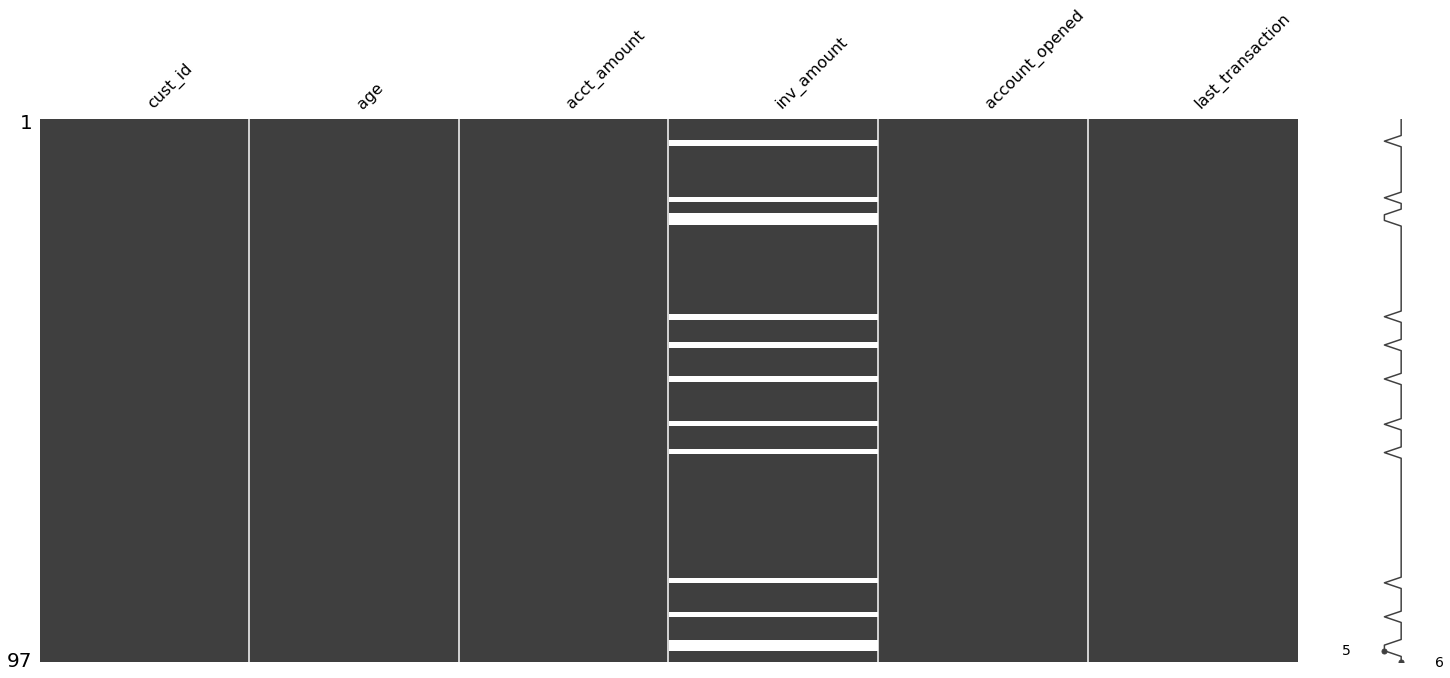

In [35]:
# Print number of missing values in banking
print(banking.isna().sum())

# Visualize missingness matrix
msno.matrix(banking)
plt.show();

[Missing investors | Python](https://campus.datacamp.com/courses/cleaning-data-in-python/advanced-data-problems-3?ex=10)

> Isolate the values of `banking` missing values of `inv_amount` into `missing_investors` and with non-missing `inv_amount` values into `investors`.

In [36]:
# Isolate missing and non missing values of inv_amount
missing_investors = banking[banking['inv_amount'].isna()]
investors = banking[~banking['inv_amount'].isna()]

In [37]:
missing_investors.describe()

,age,acct_amount,inv_amount
count,13.000000,13.000000,0.0
mean,21.846154,73231.238462,NaN
std,1.519109,25553.327176,NaN
min,20.000000,21942.370000,NaN
25%,21.000000,66947.300000,NaN
50%,21.000000,86028.480000,NaN
75%,23.000000,89855.980000,NaN
max,25.000000,99998.350000,NaN


In [38]:
investors.describe()

,age,acct_amount,inv_amount
count,84.000000,84.000000,84.000000
mean,43.559524,75095.273214,44717.885476
std,10.411244,32414.506022,26031.246094
min,26.000000,12209.840000,3216.720000
25%,34.000000,57373.062500,22736.037500
50%,45.000000,83061.845000,44498.460000
75%,53.000000,94165.965000,66176.802500
max,59.000000,250046.760000,93552.690000


[Missing investors | Python](https://campus.datacamp.com/courses/cleaning-data-in-python/advanced-data-problems-3?ex=10)

> Sort the `banking` DataFrame by the `age` column and plot the missingness matrix of `banking_sorted`.

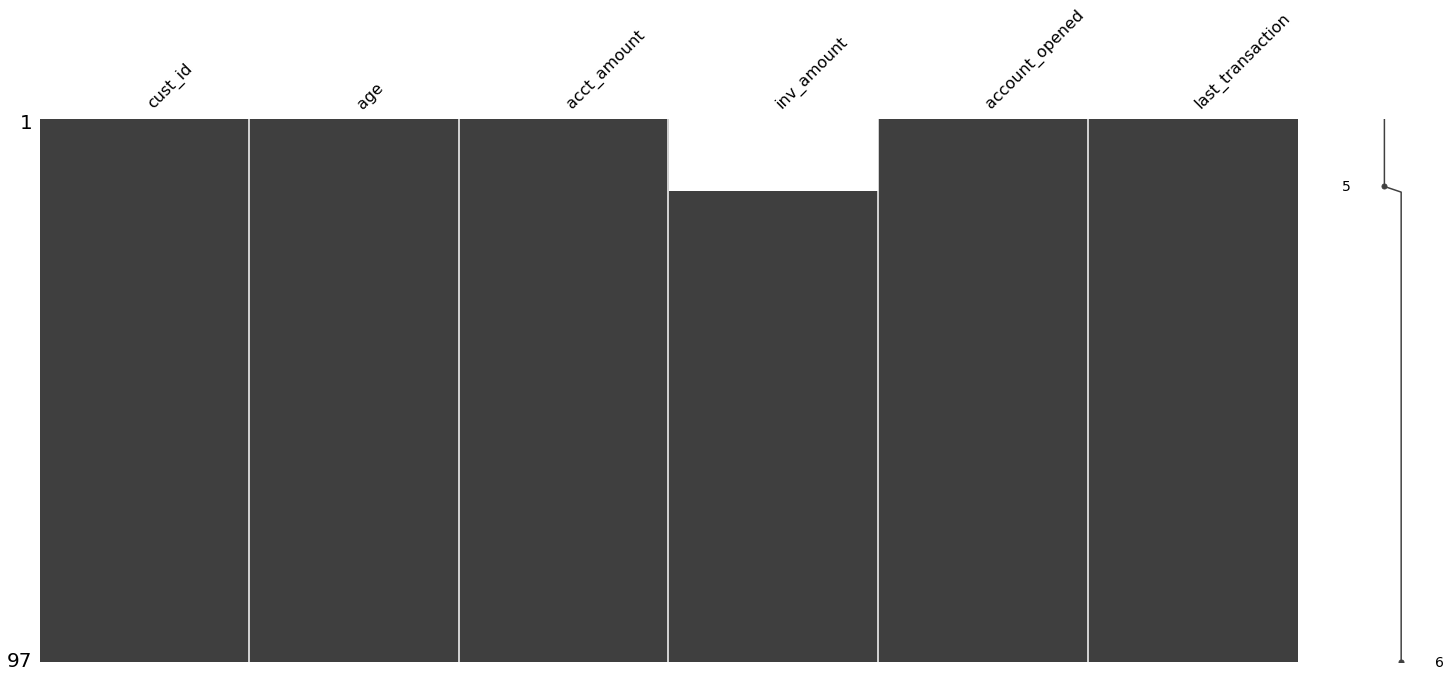

In [40]:
# Sort banking by age and visualize
banking_sorted = banking.sort_values(by='age')
msno.matrix(banking_sorted)
plt.show()

## Follow the money
> 
> In this exercise, you're working with another version of the `banking` DataFrame that contains missing values for both the `cust_id` column and the `acct_amount` column.
> 
> You want to produce analysis on how many unique customers the bank has, the average amount held by customers and more. You know that rows with missing `cust_id` don't really help you, and that on average `acct_amount` is usually 5 times the amount of `inv_amount`.
> 
> In this exercise, you will drop rows of `banking` with missing `cust_id`s, and impute missing values of `acct_amount` with some domain knowledge.

### init

In [41]:
###################
##### Dataframe
###################

#upload and download

from downloadfromFileIO import saveFromFileIO
""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
uploadToFileIO(banking)
"""

tobedownloaded="""
{pandas.core.frame.DataFrame: {'banking.csv': 'https://file.io/hNm6EdIP3MUS'}}
"""
prefixToc='3.2'
prefix = saveFromFileIO(tobedownloaded, prefixToc=prefixToc)

#initialisation

import pandas as pd
banking = pd.read_csv(prefix+'banking.csv',index_col=0)

import missingno as msno
import matplotlib.pyplot as plt

Téléchargements à lancer
{'pandas.core.frame.DataFrame': {'banking.csv': 'https://file.io/hNm6EdIP3MUS'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4507    0  4507    0     0   3800      0 --:--:--  0:00:01 --:--:--  3796



### code

[Follow the money | Python](https://campus.datacamp.com/courses/cleaning-data-in-python/advanced-data-problems-3?ex=11)

> -   Use `.dropna()` to drop missing values of the `cust_id` column in `banking` and store the results in `banking_fullid`.
> -   Compute the estimated `acct_amount` of `banking_fullid` knowing that `acct_amount` is usually `inv_amount * 5` and assign the results to `acct_imp`.
> -   Impute the missing values of `acct_amount` in `banking_fullid` with the newly created `acct_imp` using `.fillna()`.

In [43]:
# Drop missing values of cust_id
banking_fullid = banking.dropna(subset = ['cust_id'])

# Compute estimated acct_amount
acct_imp = banking_fullid['inv_amount']*5

# Impute missing acct_amount with corresponding acct_imp
banking_imputed = banking_fullid.fillna({'acct_amount':acct_imp})

# Print number of missing values
print(banking_imputed.isna().sum())

cust_id             0
acct_amount         0
inv_amount          0
account_opened      0
last_transaction    0
dtype: int64
